In [50]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from config import API_Key
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

531

In [57]:
# Print the city count to confirm sufficient count
city1=pd.DataFrame(cities)
city1.to_csv(path_or_buf="city_list.csv")
city_list = pd.read_csv("city_list.csv", dtype=str)
city2=city_list.rename(index=str, columns={"0": "City"})
city3=city2.drop(['Unnamed: 0'], axis=1)

In [58]:
city3["Lat"] = ""
city3["Lng"] = ""
city3["Temp (F)"] = ""
city3["Humidity (%)"] = ""
city3["Cloudiness (%)"] = ""
city3["Wind Speed (mph)"] = ""

In [59]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_Key

In [71]:
# Loop through the cities_pd and run a lat/long search for each city
for index, row in city3.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + API_Key

    city = row['City']

    # update address key value
    city_url = (f"{url}&q={city}")

    # make request
    cities_lat_lng = requests.get(city_url)
    
#     # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    print(f"Searching for Index {index}: {city}. The url is included below.")
    print(city_url)
    
#     # convert to json
    cities_lat_lng = cities_lat_lng.json()
    print("--------------------------------------------")
    try:
        city3.loc[index, "Lat"] = cities_lat_lng["coord"]["lat"]
        city3.loc[index, "Lng"] = cities_lat_lng["coord"]["lon"]
        city3.loc[index, "Temp (F)"] = cities_lat_lng["main"]["temp"]
        city3.loc[index, "Humidity (%)"] = cities_lat_lng["main"]["humidity"]
        city3.loc[index, "Cloudiness (%)"] = cities_lat_lng["clouds"]["all"]
        city3.loc[index, "Wind Speed (mph)"] = cities_lat_lng["wind"]["speed"]
    except (KeyError, IndexError):
        print(f"Missing field/result... skipping {city}. Index {index}: {city} will not be included in the final table")
#Visualize to confirm lat lng appear


Searching for Index 0: iqaluit. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=iqaluit
--------------------------------------------
Searching for Index 1: labuan. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=labuan
--------------------------------------------
Searching for Index 2: mataura. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=mataura
--------------------------------------------
Searching for Index 3: manakara. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=manakara
--------------------------------------------
Searching for Index 4: palmer. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f

Searching for Index 41: jishou. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=jishou
--------------------------------------------
Searching for Index 42: kaitangata. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=kaitangata
--------------------------------------------
Searching for Index 43: severodvinsk. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=severodvinsk
--------------------------------------------
Searching for Index 46: saint anthony. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=saint anthony
--------------------------------------------
Searching for Index 47: flinders. The url is included below.
http://api.openweathermap.org/data/2.5/weather?un

Searching for Index 86: castro. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=castro
--------------------------------------------
Searching for Index 87: kapaa. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=kapaa
--------------------------------------------
Searching for Index 89: oberkirch. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=oberkirch
--------------------------------------------
Searching for Index 90: bezhanitsy. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=bezhanitsy
--------------------------------------------
Searching for Index 91: upernavik. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66

Searching for Index 134: ketchikan. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=ketchikan
--------------------------------------------
Searching for Index 135: tasiilaq. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=tasiilaq
--------------------------------------------
Searching for Index 136: cap-aux-meules. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=cap-aux-meules
--------------------------------------------
Searching for Index 137: maralal. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=maralal
--------------------------------------------
Searching for Index 138: skjervoy. The url is included below.
http://api.openweathermap.org/data/2.5/weather?uni

Searching for Index 175: caxito. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=caxito
--------------------------------------------
Searching for Index 176: el estor. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=el estor
--------------------------------------------
Searching for Index 177: mount isa. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=mount isa
--------------------------------------------
Searching for Index 178: alofi. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=alofi
--------------------------------------------
Searching for Index 179: portland. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66

Searching for Index 215: domzale. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=domzale
--------------------------------------------
Searching for Index 216: port lincoln. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=port lincoln
--------------------------------------------
Searching for Index 218: woodstock. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=woodstock
--------------------------------------------
Searching for Index 219: miandrivazo. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=miandrivazo
--------------------------------------------
Searching for Index 220: padang. The url is included below.
http://api.openweathermap.org/data/2.5/weather?uni

Searching for Index 256: hailar. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=hailar
--------------------------------------------
Searching for Index 258: port hardy. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=port hardy
--------------------------------------------
Searching for Index 259: port hedland. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=port hedland
--------------------------------------------
Searching for Index 260: nha trang. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=nha trang
--------------------------------------------
Searching for Index 261: sao felix do xingu. The url is included below.
http://api.openweathermap.org/data/2.5/wea

Searching for Index 296: rayong. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=rayong
--------------------------------------------
Searching for Index 299: valparaiso. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=valparaiso
--------------------------------------------
Searching for Index 300: hamilton. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=hamilton
--------------------------------------------
Searching for Index 301: galle. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=galle
--------------------------------------------
Searching for Index 302: songwa. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66

Searching for Index 340: pandan. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=pandan
--------------------------------------------
Searching for Index 341: nanortalik. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=nanortalik
--------------------------------------------
Searching for Index 342: morondava. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=morondava
--------------------------------------------
Searching for Index 343: gat. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=gat
--------------------------------------------
Searching for Index 344: tuy hoa. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669

Searching for Index 381: coihaique. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=coihaique
--------------------------------------------
Searching for Index 382: bonfim. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=bonfim
--------------------------------------------
Searching for Index 383: adrar. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=adrar
--------------------------------------------
Searching for Index 384: seminole. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=seminole
--------------------------------------------
Searching for Index 385: katsuura. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66

Searching for Index 423: karasburg. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=karasburg
--------------------------------------------
Searching for Index 425: karaton. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=karaton
--------------------------------------------
Searching for Index 427: krasnyy yar. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=krasnyy yar
--------------------------------------------
Searching for Index 428: nome. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=nome
--------------------------------------------
Searching for Index 429: roebourne. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Searching for Index 465: oranjestad. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=oranjestad
--------------------------------------------
Searching for Index 466: meulaboh. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=meulaboh
--------------------------------------------
Searching for Index 467: mecca. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=mecca
--------------------------------------------
Searching for Index 468: vestmanna. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=vestmanna
--------------------------------------------
Searching for Index 471: miracema do tocantins. The url is included below.
http://api.openweathermap.org/data/2.5/weather?un

Searching for Index 508: pacific grove. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=pacific grove
--------------------------------------------
Searching for Index 509: pakxan. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=pakxan
--------------------------------------------
Searching for Index 510: gimbi. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=gimbi
--------------------------------------------
Searching for Index 511: poum. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=669a883e950d1f9a2f5f7f044f9c7e5d&q=poum
--------------------------------------------
Searching for Index 513: rio brilhante. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

In [63]:
city3 = city3.apply(pd.to_numeric, errors='ignore')
city3 = city3.dropna() 

In [65]:
x_axis = city3["Lat"].astype(float)
y_axis1 = city3["Temp (F)"].astype(float)
y_axis2 = city3["Humidity (%)"].astype(float)
y_axis3 = city3["Cloudiness (%)"].astype(float)
y_axis4 = city3["Wind Speed (mph)"].astype(float)

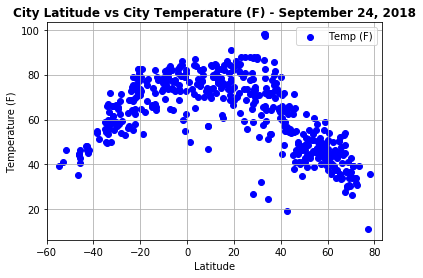

In [66]:
plt.scatter(x_axis, y_axis1, c='b')
plt.grid()
plt.xlim(min(x_axis)-5, max(x_axis)+5)
plt.ylim(min(y_axis1)-5, max(y_axis1)+5)
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs City Temperature (F) - September 24, 2018", fontsize=12, fontweight="bold")
plt.savefig("Images/City Latitude vs City Temperature (F) - September 24, 2018")
plt.show()

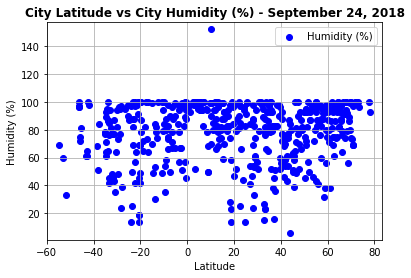

In [67]:
plt.scatter(x_axis, y_axis2, c='b')
plt.grid()
plt.xlim(min(x_axis)-5, max(x_axis)+5)
plt.ylim(min(y_axis2)-5, max(y_axis2)+5)
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs City Humidity (%) - September 24, 2018", fontsize=12, fontweight="bold")
plt.savefig("Images/City Latitude vs City Humidity (%) - September 24, 2018")
plt.show()

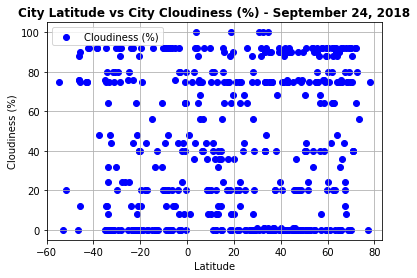

In [68]:
plt.scatter(x_axis, y_axis3, c='b')
plt.grid()
plt.xlim(min(x_axis)-5, max(x_axis)+5)
plt.ylim(min(y_axis3)-5, max(y_axis3)+5)
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs City Cloudiness (%) - September 24, 2018", fontsize=12, fontweight="bold")
plt.savefig("Images/City Latitude vs City Cloudiness (%) - September 24, 2018")
plt.show()

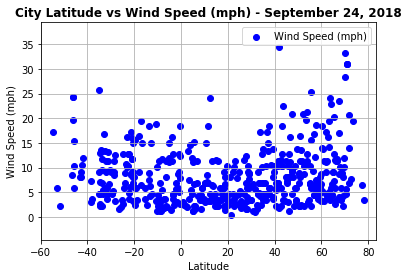

In [69]:
plt.scatter(x_axis, y_axis4, c='b')
plt.grid()
plt.xlim(min(x_axis)-5, max(x_axis)+5)
plt.ylim(min(y_axis4)-5, max(y_axis4)+5)
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (mph) - September 24, 2018", fontsize=12, fontweight="bold")
plt.savefig("Images/City Latitude vs Wind Speed (mph) - September 24, 2018")
plt.show()

In [87]:
print("Observation 1:")
print("---------------------------------------------------------------------------------------------------------------------")
print("Temperature vs Latitude") 
print("As you approach the equator (0 Latitude) the temperature increases")
print("")
print("Observation 2:")
print("---------------------------------------------------------------------------------------------------------------------")
print("Cloudiness vs Latitude")
print("Cloudiness does not appear to have any relationship with latitude. A person has the same cloudiness chance no matter where they are on earth")
print("")
print("Observation 3:")
print("---------------------------------------------------------------------------------------------------------------------")
print("Humidity vs Latitude") 
print("The maximum humidity any latitude can obtain is 100%. Minimum humidity appears to be near the -20 to -30 degree latitude and the +20 to +30 degree latitude.")

Observation 1:
---------------------------------------------------------------------------------------------------------------------
Temperature vs Latitude
As you approach the equator (0 Latitude) the temperature increases

Observation 2:
---------------------------------------------------------------------------------------------------------------------
Cloudiness vs Latitude
Cloudiness does not appear to have any relationship with latitude. A person has the same cloudiness chance no matter where they are on earth

Observation 3:
---------------------------------------------------------------------------------------------------------------------
Humidity vs Latitude
The maximum humidity any latitude can obtain is 100%. Minimum humidity appears to be near the -20 to -30 degree latitude and the +20 to +30 degree latitude.
